In [8]:
import ema as em
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
%config InlineBackend.figure_format = 'svg'

# Example 12.2

(Page 332 of CE-220 Fall 2019 course reader)

In [9]:
mdl = em.Model(2,3)

n1 = mdl.node('1',  0.0,  0.0)
n2 = mdl.node('2',  0.0,  6.0)
n3 = mdl.node('3',  4.0,  6.0)
n4 = mdl.node('4',  8.0,  6.0)

a = mdl.beam('a', n1,  n2)
b = mdl.beam('b', n2,  n3)
c = mdl.beam('c', n3,  n4)
d = mdl.truss('d', n1,  n4)

mdl.fix(n1, ['x', 'y', 'rz'])
mdl.fix(n4, ['y'])

n2.p['x'] =  20
n3.p['y'] = -20

mdl.numDOF()
em.analysis.characterize(mdl)

(0, 2)

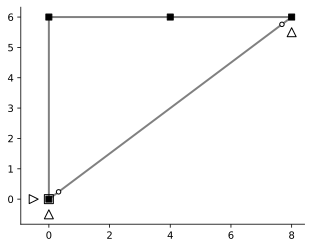

In [10]:
fig, ax = plt.subplots()
em.plot_structure(mdl, ax)

In [11]:
# Define plastic capacity
Qp_c = 160
Qp_g = 120
a.Qp['+']['1'] = a.Qp['-']['1'] = 1000
a.Qp['+']['2'] = a.Qp['-']['2'] = Qp_c
a.Qp['+']['3'] = a.Qp['-']['3'] = Qp_c

d.Qp['+']['1'] = d.Qp['-']['1'] = 50

b.Qp['+']['1'] = b.Qp['-']['1'] = 1000
b.Qp['+']['2'] = b.Qp['-']['2'] = Qp_g
b.Qp['+']['3'] = b.Qp['-']['3'] = Qp_g
c.Qp['+']['1'] = c.Qp['-']['1'] = 1000
c.Qp['+']['2'] = c.Qp['-']['2'] = Qp_g
c.Qp['+']['3'] = c.Qp['-']['3'] = Qp_g

In [12]:
B = em.B_matrix(mdl)
B.o

,$a_1$,$a_2$,$a_3$,$b_1$,$b_2$,$b_3$,$c_1$,$c_2$,$c_3$,$d_1$
$1$,0.0,0.16667,0.16667,-1.0,-0.00,-0.00,0.0,0.00,0.00,0.0
$2$,1.0,-0.00000,-0.00000,-0.0,0.25,0.25,0.0,0.00,0.00,0.0
$3$,0.0,0.00000,1.00000,0.0,1.00,0.00,0.0,0.00,0.00,0.0
$4$,0.0,0.00000,0.00000,1.0,0.00,0.00,-1.0,-0.00,-0.00,0.0
$5$,0.0,0.00000,0.00000,0.0,-0.25,-0.25,-0.0,0.25,0.25,0.0
$6$,0.0,0.00000,0.00000,0.0,0.00,1.00,0.0,1.00,0.00,0.0
$7$,0.0,0.00000,0.00000,0.0,0.00,0.00,1.0,0.00,0.00,0.8
$8$,0.0,0.00000,0.00000,0.0,0.00,0.00,0.0,0.00,1.00,0.0


In [13]:
var = em.analysis.setupPlasticAnalysis_wLBT(mdl)
var

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([[ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
        [-0., -1., -0., -0., -0., -0., -0., -0., -0., -0., -0.],
        [-0., -0., -1., -0., -0., -0., -0., -0., -0., -0., -0.],
        [-0., -0., -0., -1., -0., -0., -0., -0., -0., -0., -0.],
        [-0., -0., -0., -0., -1., -0., -0., -0., -0., -0., -0.],
        [-0., -0., -0., -0., -0., -1

In [14]:
em.analysis.PlasticAnalysis_wLBT(mdl)

(3.199999999999999,
 iForce_vector([ -34.,  160.,  -16.,  -40.,   16.,  120.,  -40., -120.,
                   0.,   50.]))